In [ ]:
import requests
import pandas as pd

#Esta librería servirá para eliminar un mensaje de Warning que saldría y con esto se deshabilita el mensaje.
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

La obtención del DataFrame empezaría con la conexión a la API de Strava. Strava es una aplicación donde los usuarios registran sus actividades físicas y las comparte con demás usuarios.

La información que se puede obtener de la API de Strava es la del usuario que conceda el acceso, en este caso, el DataFrame que se obtiene es de mis carreras publicadas en la aplicación. El límite de solicitudes que se pueden realizar son 200 cada 15 minutos y 2.000 diarios.

Solo hay 3 actividades publicadas pero la ejecución del código y la conexión con la API sería la misma sin importar el número de actividades publicadas.

Para obtener las claves de la API es necesario tener una cuenta de Strava, yo en mi caso ya estaba hecha por ser usuario de la app. En este caso los dos primeros links son los que permiten obtener el 'refresh_token', la única clave que no es fija sino que va variando cada cierto tiempo.

El 'refresh_token' se obtendrá de realizar un GET de la url de autenticación propia de la API.
Con este token, se obtienen una lista de diccionarios con las actividades del usuario, para ello se realiza un GET con la url de actividades, añadiéndole una cabecera y unos parámetros para seleccionar el número máximo de actividades, en este caso 10 pero se podría regular.

Una vez obtenida la lista faltaría transformarlo en un DataFrame, para ello se eligen una serie de columnas, en este caso se han elegido seis en específico pero se podrían haber elegido cualquier otras.

In [ ]:
auth_url = "https://www.strava.com/oauth/token"
activities_url = "https://www.strava.com/api/v3/athlete/activities"

info_personal = {

    'client_id':'------',
    'client_secret':'----------------------------------------',
    'refresh_token':'----------------------------------------',
    'grant_type':'refresh_token',
    'f' : 'json'

}
print("Requesting Token...\n")
res = requests.post(auth_url, data=info_personal, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 10, 'page': 1}
activities_list = requests.get(activities_url, headers=header, params=param).json()

# Aquí se pueden ver los distintos datos que ofrece cada una de las actividades.
# datos = activities_list[0].keys()
# print(datos)

activities_df = pd.DataFrame(activities_list)[['name','distance','sport_type','moving_time','average_speed','max_speed']]

nombres_cols = {

    'name': 'Nombre',
    'distance':'Distancia(m)',
    'sport_type':'Deporte',
    'moving_time':'t(s)',
    'average_speed':'V media',
    'max_speed':'V max(m/s)'

}

activities_df = activities_df.rename(columns = nombres_cols)

print(activities_df)

Requesting Token...

Access Token = d3d91486700df72902ed195162d6621e6322a1f5

                       Nombre  Distancia(m) Deporte  t(s)  V media  V max(m/s)
0  Primera del año casi muero        6166.0     Run  1657    3.721       7.020
1            Carrera nocturna        5998.2     Run  1695    3.539       5.806
2            Carrera nocturna        5131.7     Run  1452    3.534       6.244


Como nos comentó y comprobé después, la version free de la API de Twitter no permitía obtener un DataFrame de la aplicación, entra las funcionalidades posible están las de publicar tweets, que es lo que se realizará a continuación.

Para poder utilizar la API de X (Twitter) era necesario instalarse la librería de Tweepy. Una vez instalada había que crearse una cuenta de desarrollador para poder obtener las claves de consumer, tanto la key como la secret, y los tokens de acceso.

Una vez obtenidos estos valores se realiza una autenticación de tipo OAUth 1.0 para verificar que el usuario es el que se ha registrado como desarrollador para después usando a clase API se creará la variable api necesaria para poder seguir trabajando.

Lo último antes de publicar el Tweet es acceder a la cuenta de Twitter dando el permiso "read and write" en las opciones de desarrolladores, sin cambiar esto no funcionaría el script. Una vez accedido a la cuenta se han publicado estos dos tweets que están debajo.

Las limitaciones que presenta esta API son entre otras la de no poder tuitear dos veces el mismo tuit y la de un límite de 1500 tuits al mes.

Al final del Notebook se adjunta foto con los tuits publicados.

In [ ]:
!pip install tweepy

In [ ]:
import tweepy
import pandas as pd

#Definir las keys:
consumer_key = '------------------'
consumer_secret = '-----------------------------------------------'

#Tokens de acceso:
access_token = '-------------------------------'
access_token_secret = '----------------------------------------------'

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

cuenta = tweepy.Client(consumer_key = consumer_key, consumer_secret = consumer_secret,
                      access_token = access_token, access_token_secret = access_token_secret)

tweet1 = cuenta.create_tweet(text = "Prueba API Twitter")
tweet2 = cuenta.create_tweet(text = "Las APIs de Strava y de Twitter funcionan.")

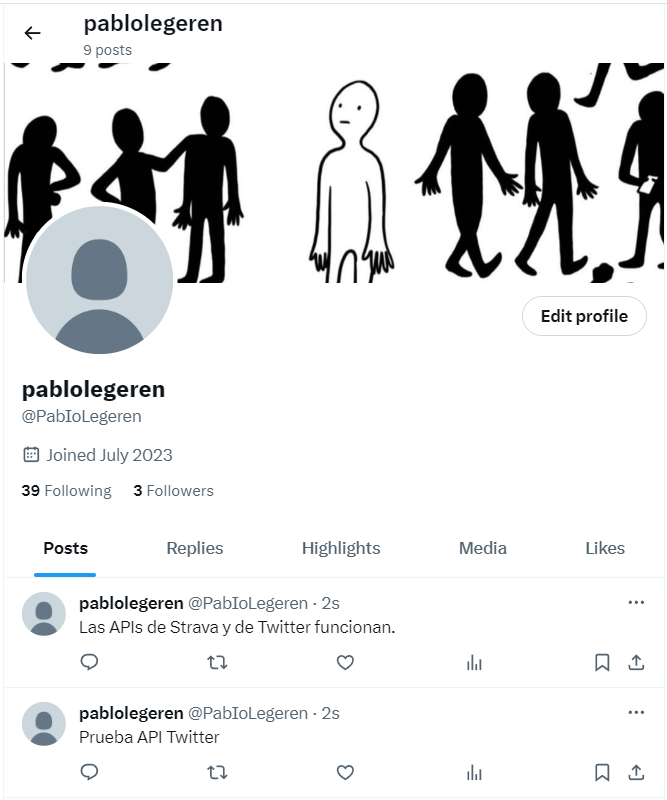